In [1]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import Common_Functions as cf 
from tensorflow import keras
from tensorflow.keras import layers 
from tensorflow.keras import models 
import os
from keras.regularizers import l2


import matplotlib
matplotlib.rcParamsDefault

os.environ['CUDA_VISIBLE_DEVICES'] = '0'
#import chirallag as cL
cf.reset()
matplotlib.rcParams.update({'legend.fontsize': 16})
matplotlib.rcParams.update({'font.size': 16})


2022-01-11 15:42:22.285189: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-11 15:42:22.309452: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-11 15:42:22.314036: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-11 15:42:22.314331: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

Memory Reset


2022-01-11 15:42:22.567474: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-11 15:42:22.567722: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-11 15:42:22.567922: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-11 15:42:22.568103: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2314 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 970, pci bus id: 0000:2b:00.0, compute capability: 5.2


In [2]:

df_pions = np.array(pd.read_csv('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/testing_data.csv',header = None))
train_x, train_y = df_pions[:-10000,:-1], (-df_pions[:-10000,-1])
val_x, val_y = df_pions[-10000:,:-1], (-df_pions[-10000:,-1])

In [33]:
opt = keras.optimizers.Adam(amsgrad= True)
epoch_num = 30

In [36]:
#Misnamed function which just returns the training history of different batch sizes
def layer_grad(batch):
        grad_loss = []
        grad_val = []
        for i in range(batch.shape[0]):
                model = models.Sequential()
                model.add(layers.Dense(300,activation= 'relu',input_shape = (train_x.shape[1],),kernel_initializer= 'he_normal'))
                model.add(layers.Dense(300,activation= 'relu',kernel_initializer= 'he_normal'))
                model.add(layers.Dense(1))
                model.compile(optimizer = opt,loss = 'mape', metrics = [['mean_absolute_error'],['mean_absolute_percentage_error']])
                model.fit(train_x,train_y,validation_data=(val_x,val_y),batch_size= batch[i] , epochs = epoch_num)
                loss = np.array(model.history.history['loss'])
                val = np.array(model.history.history['val_mean_absolute_percentage_error'])
                grad_loss.append(loss)
                grad_val.append(val)
                np.savetxt
        return grad_loss, grad_val


In [45]:
grad_loss , grad_val = layer_grad(np.array([4,16,256]))

Epoch 1/30
22500/22500 [==============================] - 19s 820us/step - loss: 25.2813 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 25.2813 - val_loss: 16.7910 - val_mean_absolute_error: 0.0218 - val_mean_absolute_percentage_error: 16.7910
Epoch 2/30
22500/22500 [==============================] - 18s 821us/step - loss: 13.4074 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 13.4074 - val_loss: 10.5895 - val_mean_absolute_error: 0.0122 - val_mean_absolute_percentage_error: 10.5895
Epoch 3/30
22500/22500 [==============================] - 18s 806us/step - loss: 11.4944 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 11.4944 - val_loss: 9.7663 - val_mean_absolute_error: 0.0118 - val_mean_absolute_percentage_error: 9.7663
Epoch 4/30
22500/22500 [==============================] - 18s 783us/step - loss: 10.3085 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 10.3085 - val_loss: 9.7615 - val_mean_absolute_error: 0.0113 - val

In [48]:
np.savetxt('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Hyperparam_Testing/Testing_Notebooks/Testing_Data/loss/loss_derviative.csv',grad_loss,delimiter= ',')
np.savetxt('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Hyperparam_Testing/Testing_Notebooks/Testing_Data/loss/validation_derivative.csv',grad_val,delimiter= ',')


In [51]:
sizes = np.array([4,16,256])

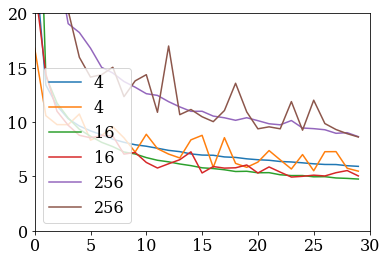

In [54]:
for i in range(sizes.shape[0]):
    plt.plot(abs(grad_loss[i]), label = str(sizes[i]))
    plt.plot(abs(grad_val[i]), label = str(sizes[i]))
    plt.ylim(0,20)
    plt.xlim(0,30)
plt.legend()
## Gradients similar 


In [ ]:
model.history

NameError: name 'model' is not defined

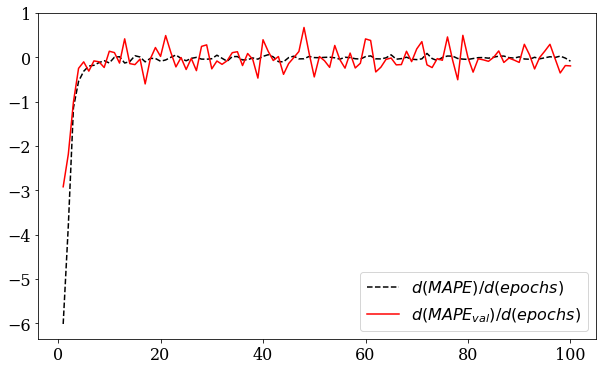

In [ ]:
epochs = np.arange(1,epoch_num+1)
fig , ax = plt.subplots(1,1, figsize = (10,6))
ax.plot(epochs,mean_grad_loss,c = 'black',linestyle = '--', label = '$d(MAPE)/d(epochs)$')
ax.plot(epochs,mean_grad_val,c = 'red', linestyle = '-', label = '$d(MAPE_{val})/d(epochs)$')
ax.legend()